# Explore transformation initializations
Stefan/Yuzhao Heng
Since Tues. Dec. 7th, 2021


We observe that with a good initialization, ICP gives good outputs, how to get good transformation initializations?

For the case of KUKAs, generalizable to rectangles, intuitively,
    the laser points should have at least one edge, matched to the rectangle
=> Exploit possible configurations of matched line segment


## Setup



In [1]:
from icecream import ic

from scripts.data_path import *
from scripts.util import *
from scripts.robo_pose_estimator import *


rcParams["figure.dpi"] = 300
rcParams['font.size'] = 6

pts_hsr = eg_hsr_scan()
pcr_kuka = get_kuka_pointcloud()

tsf_ideal = tsl_n_angle2tsf(config('heuristics.pose_guess.actual_pose'))

d_cls_res = config('heuristics.cluster_results.good')
lbs = d_cls_res['labels']
d_clusters = d_cls_res['clusters']
d_clusters = {int(k): v for k, v in d_clusters.items()}



## RANSAC
[An example usage before ICP in open3d](http://www.open3d.org/docs/0.12.0/tutorial/pipelines/global_registration.html).

[RANSAC as linear regression robust to outliers](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html).


### Verify implementation
And yes, seems that inverting the independent & dependent variables potentially produce different regression lines



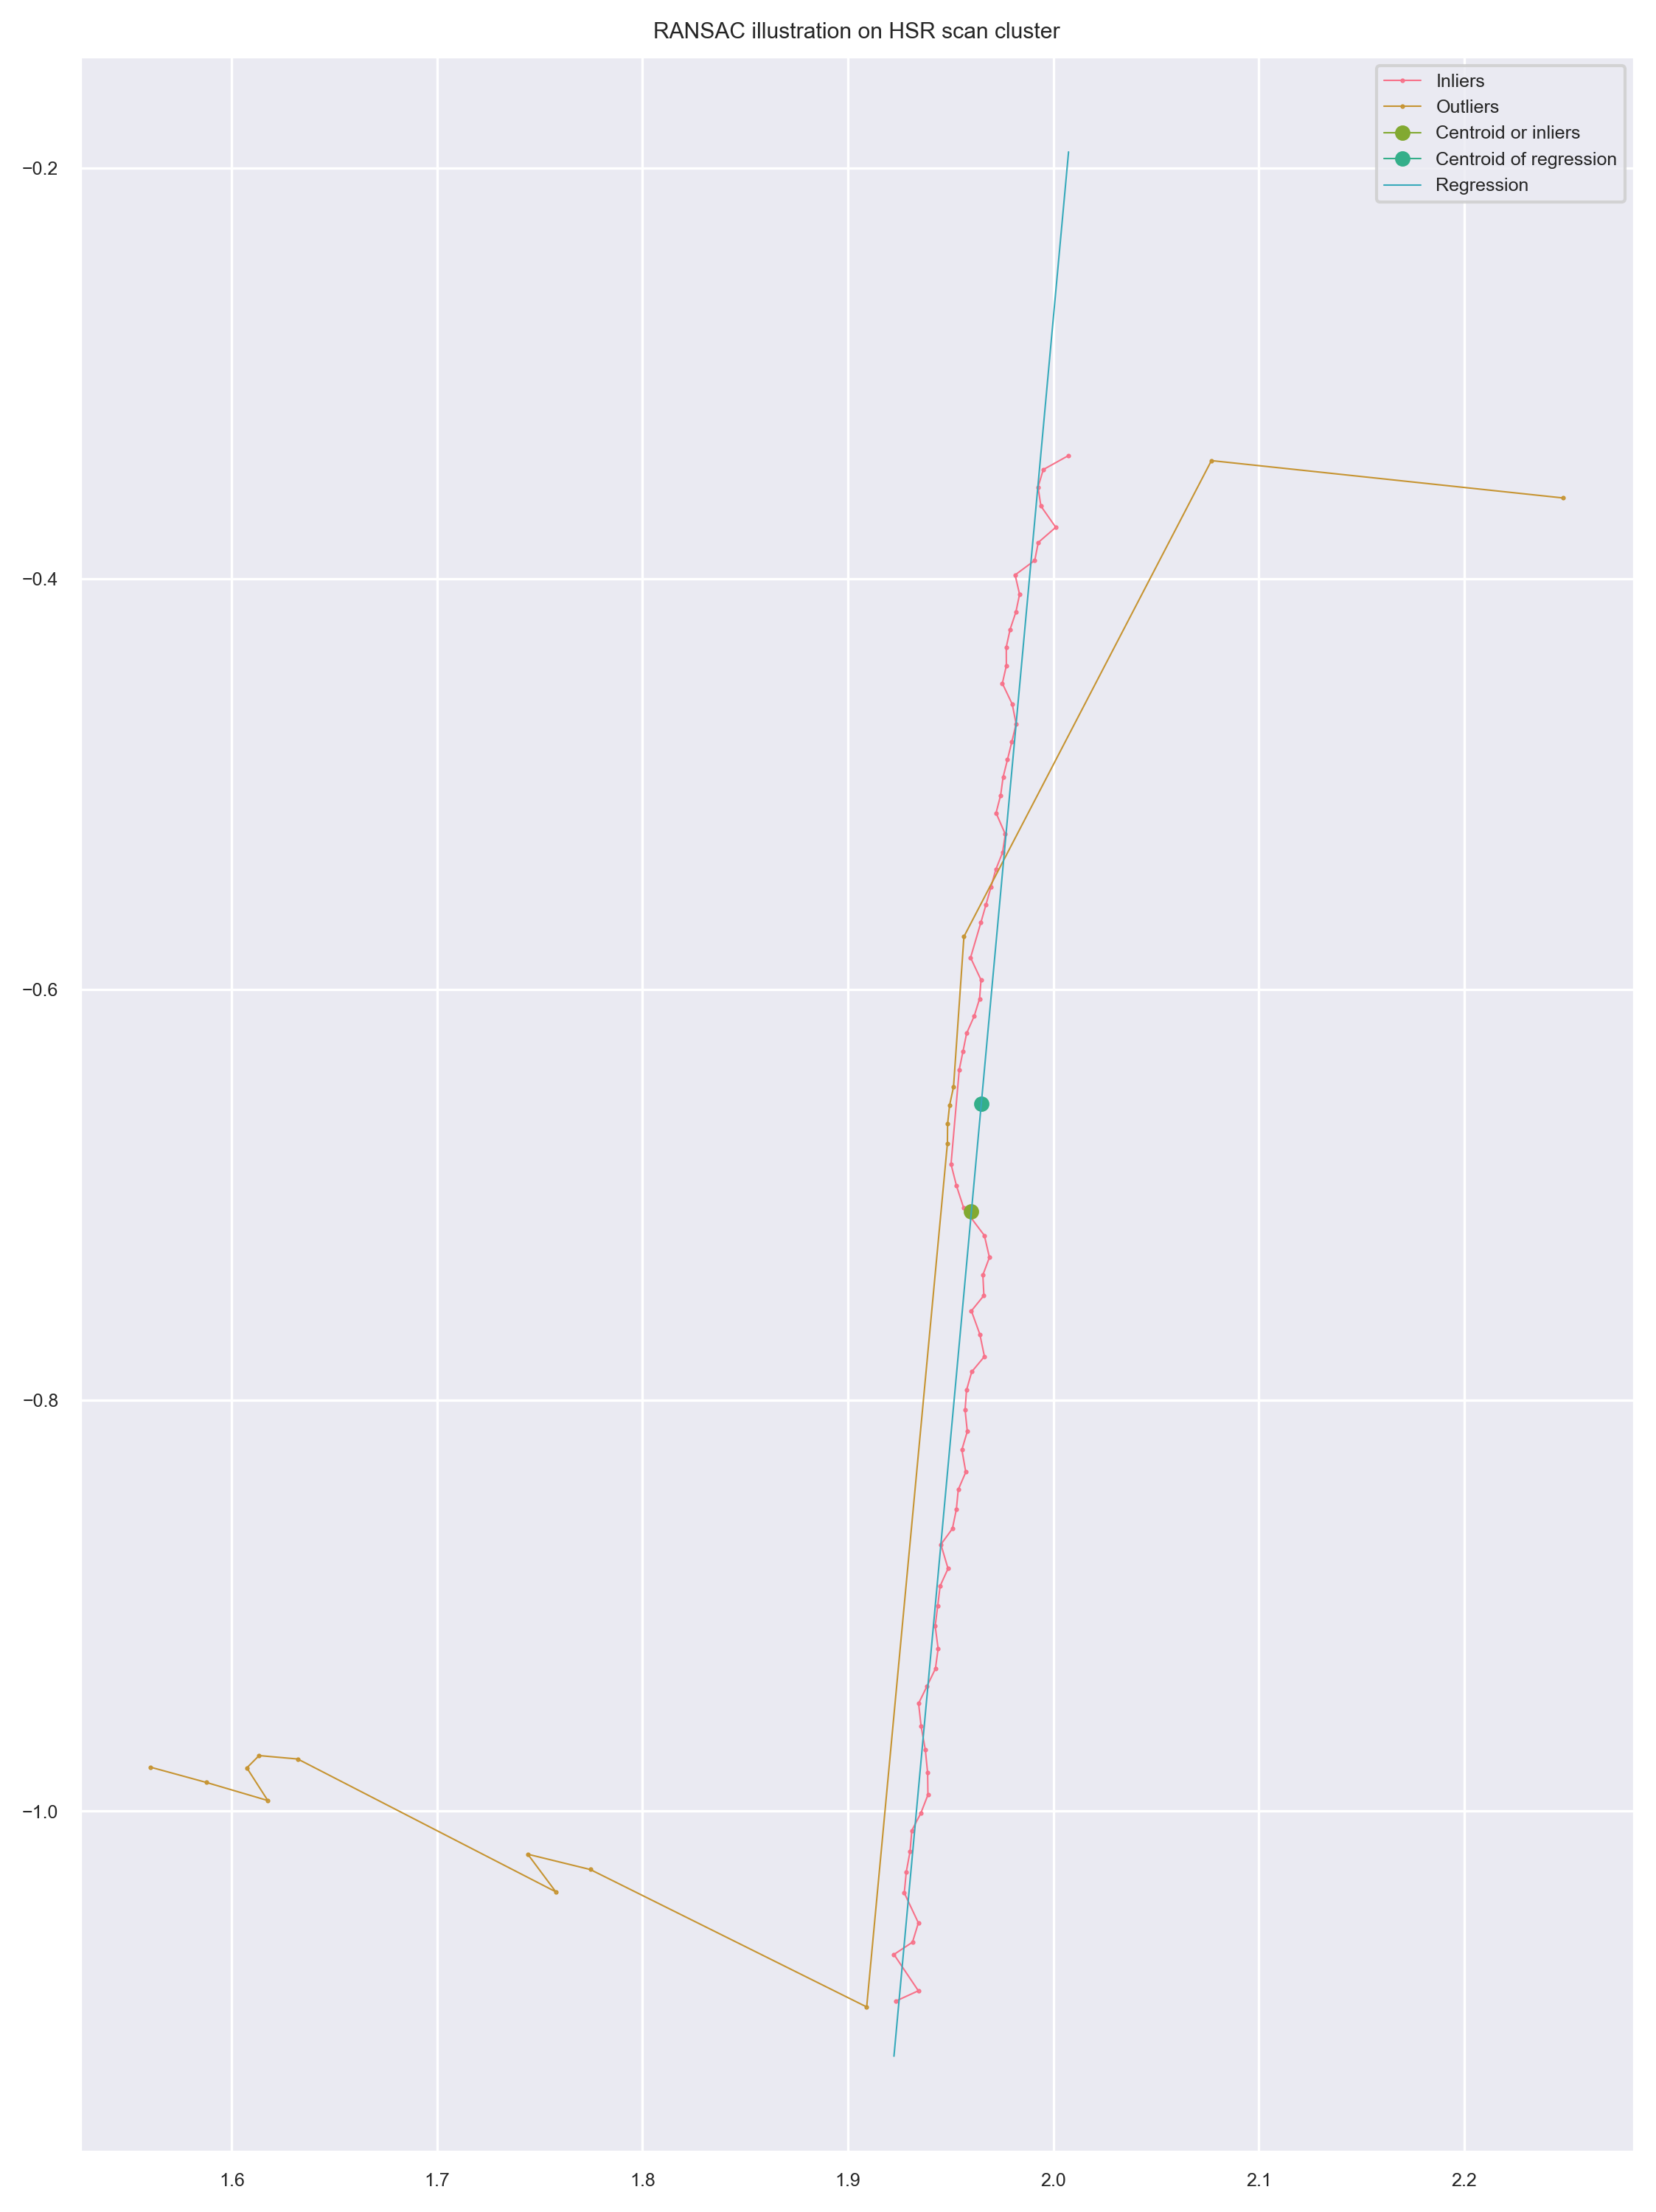

ic| coef: 10.906104068691453
    math.degrees(math.atan(coef)): 84.7610975328715
    center: [1.9648978973621913, -0.6557688188187445]


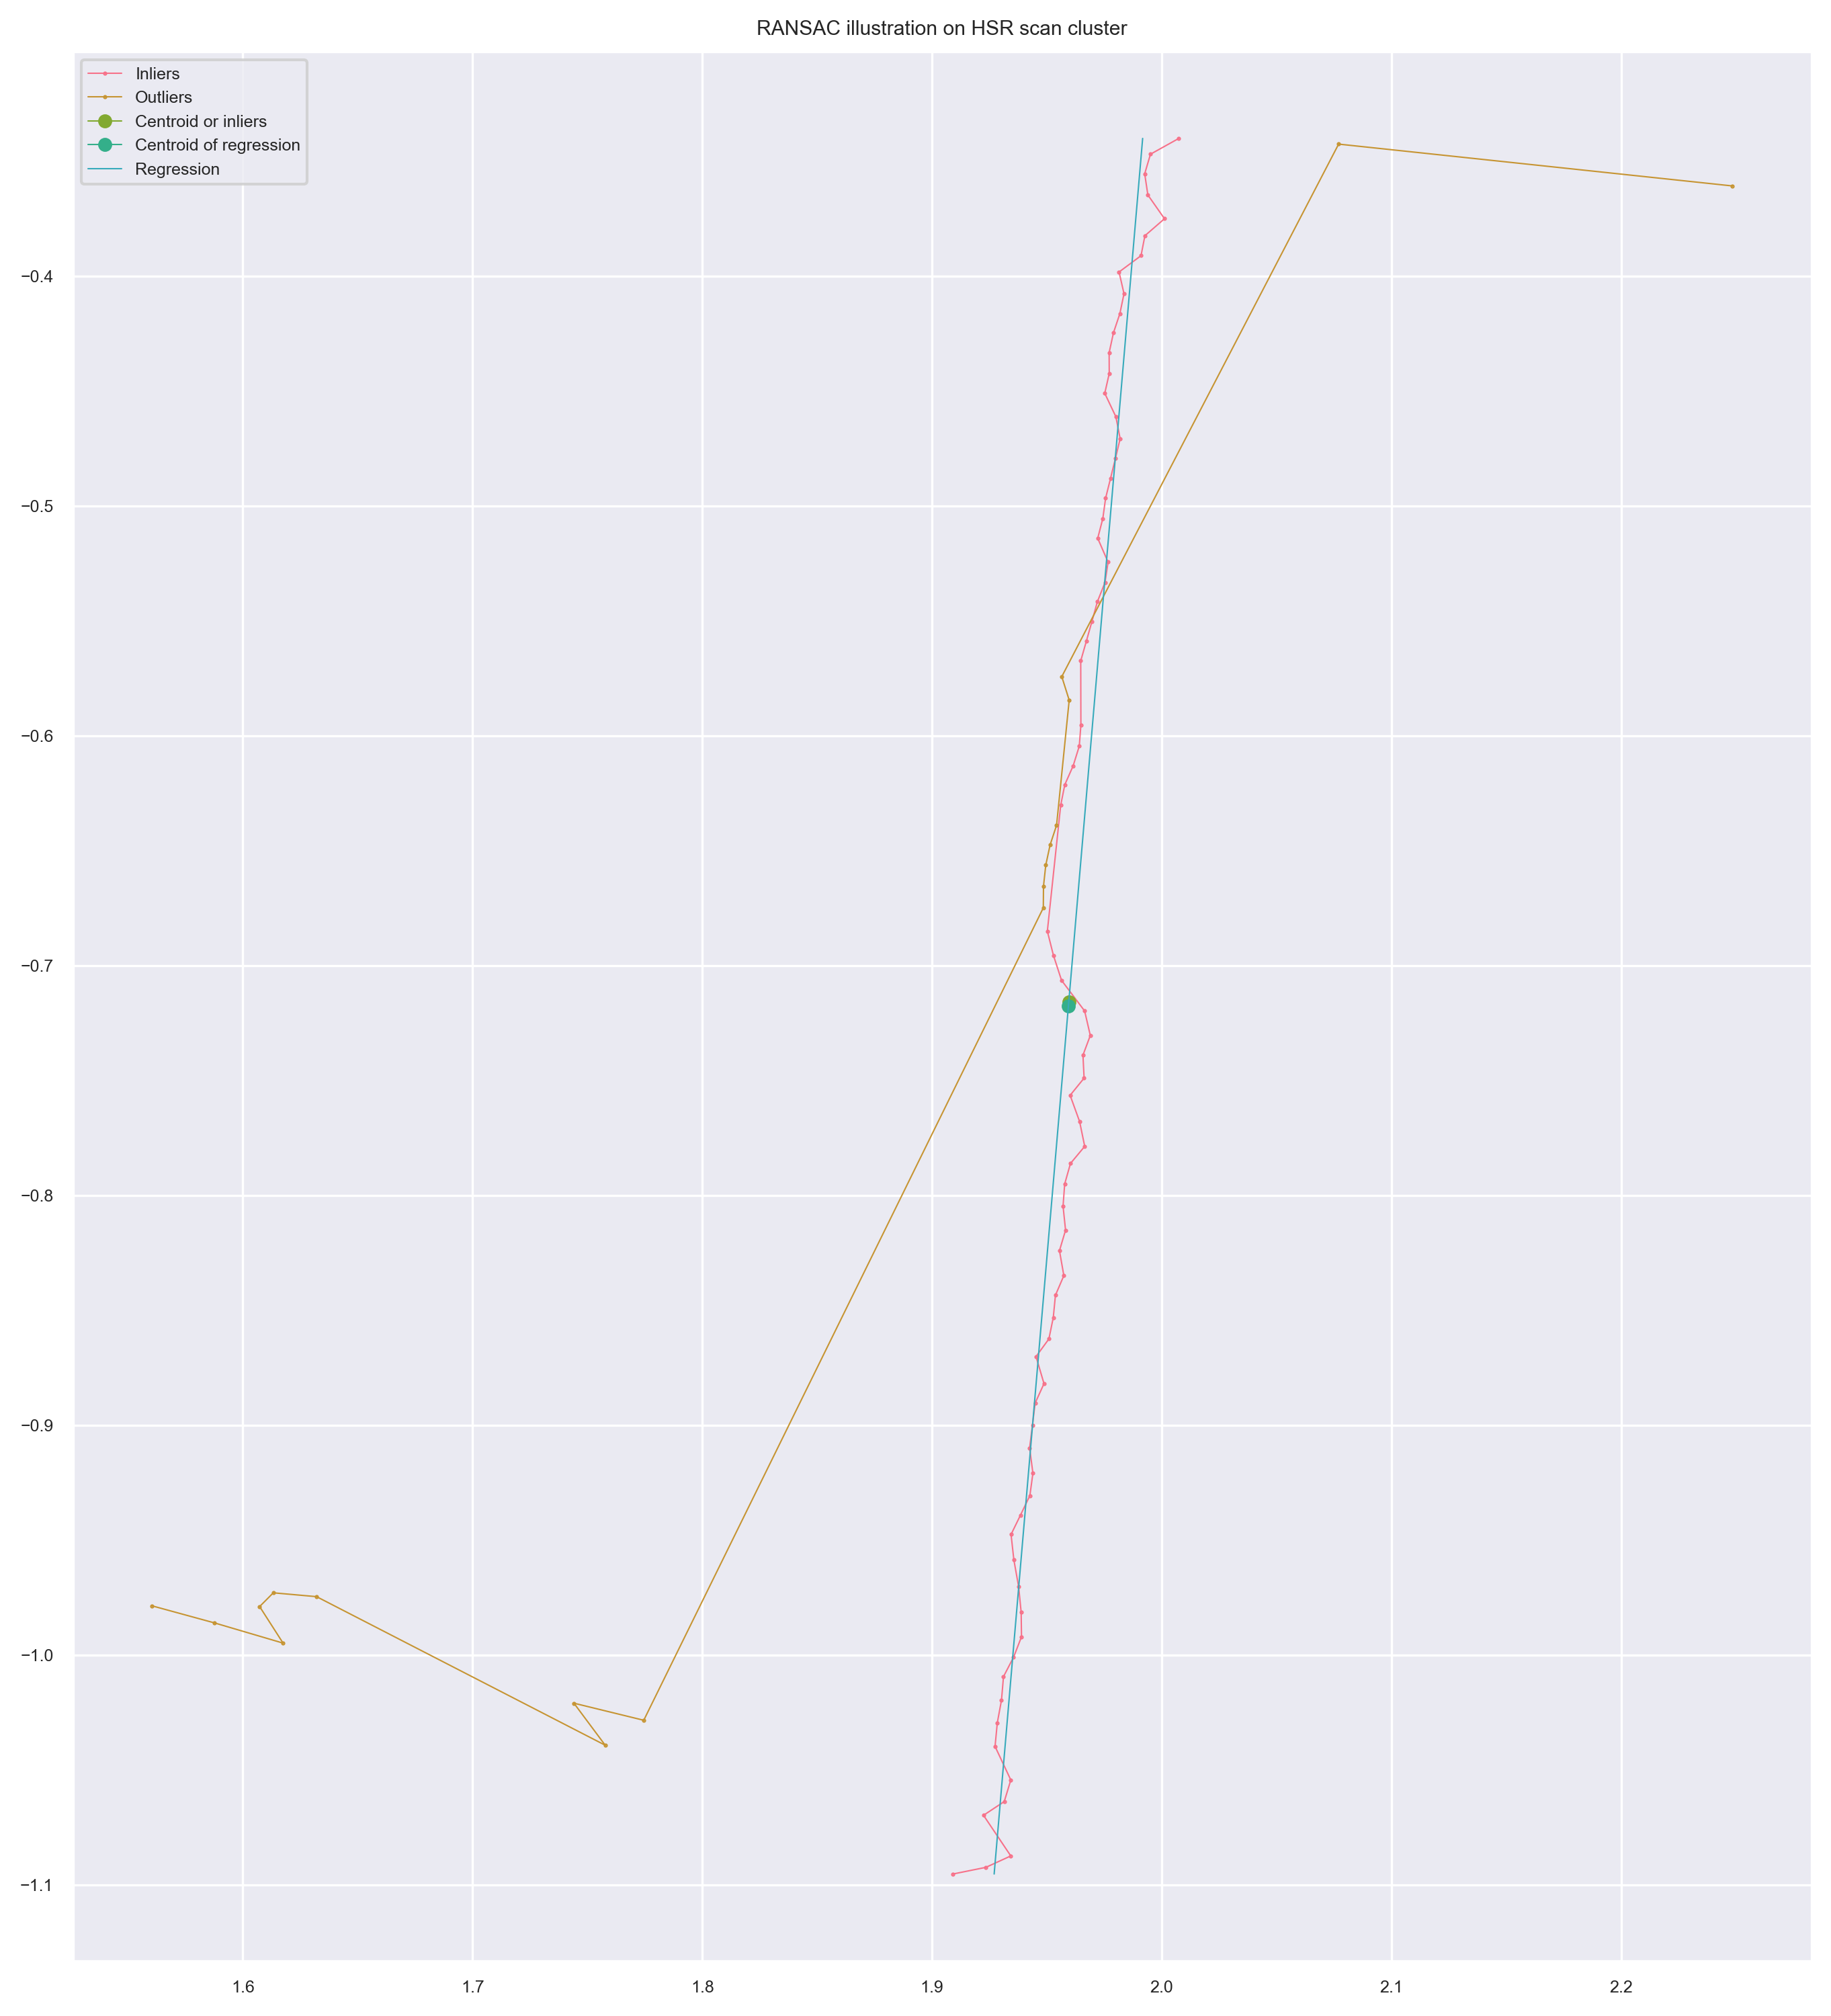

ic| coef: 11.686149144314598
    math.degrees(math.atan(coef)): 85.10903537995628
    center: [1.9593453488785213, -0.7176861254313446]


In [2]:
pts_cls = d_clusters[11]
ti = TsfInitializer(pts_cls)

for reverse in [False, True]:
    coef, center = ti.ransac_linear(plot=True, reverse=reverse)
    ic(coef, math.degrees(math.atan(coef)), center)



## Propose transformation candidates
### Verify implementation


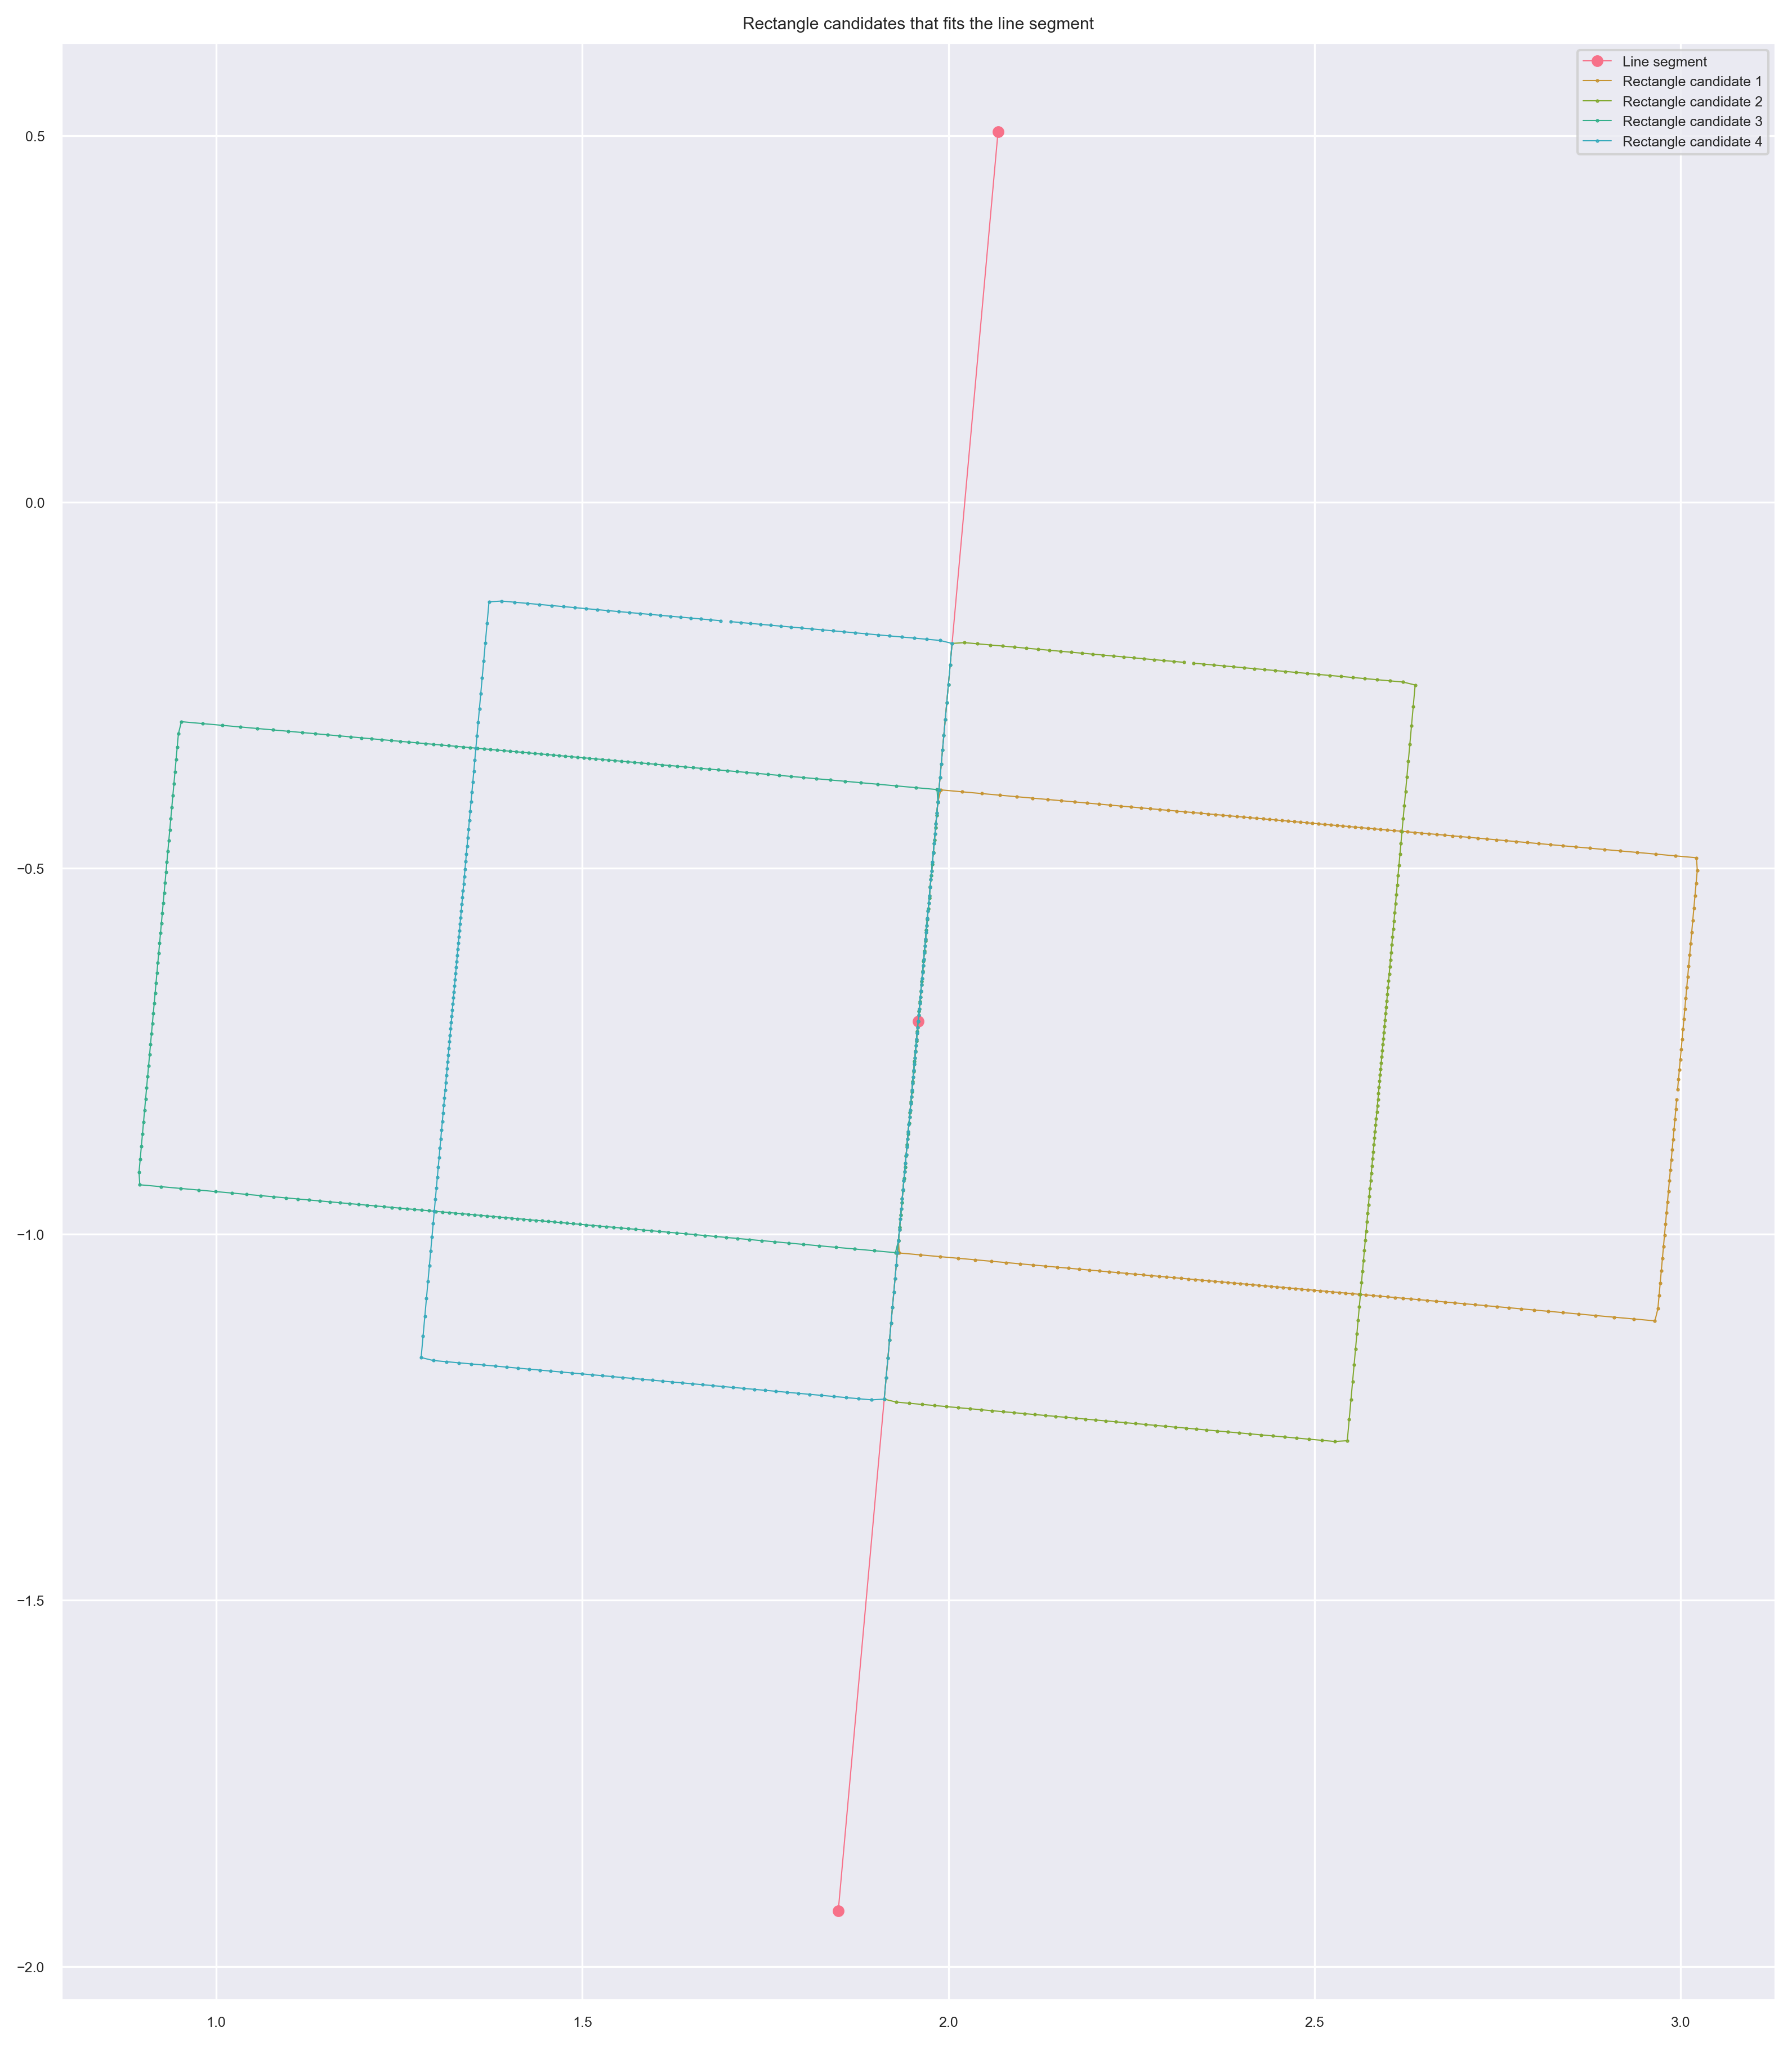

[array([[ 0.99599071,  0.08945672,  2.47734095],
        [-0.08945672,  0.99599071, -0.75577385],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 0.08945672, -0.99599071,  2.27495563],
        [ 0.99599071,  0.08945672, -0.73759624],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 0.99599071,  0.08945672,  1.44011622],
        [-0.08945672,  0.99599071, -0.66261362],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 0.08945672, -0.99599071,  1.64250153],
        [ 0.99599071,  0.08945672, -0.68079122],
        [ 0.        ,  0.        ,  1.        ]])]

In [6]:
pts_cls = d_clusters[11]
ti = TsfInitializer(pts_cls)
cands = ti.propose_rect_tsf(ti.ransac_linear(), config('dimensions.KUKA'), plot=True)
cands



### Visualize on HSR laser scan data
Following our intuition, for each cluster, we propose possible KUKA transformations



In [ ]:
# for label, pts_cls in d_clusters.items():
#     ti = TsfInitializer(pts_cls)
#     coef, center = ti.ransac_linear()
#     cands = ti.propose_rect_tsf((coef, center), config('dimensions.KUKA')return_mat=False)
#     ic(label, cands)
